<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Fall 2024 <br> FINAL PROJECT<br>Assignment 3 [GROUP Assignment]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment3_Part1_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : Fill Here for all members (Comma separated).
#### **Your Full names** : Fill Here (in same order as UNIs)
#### **Link to your Public Github repository** : Fill here (single link is expected)


## **Stanford Sentiment Treebank - Movie Review Classification**

1.   List item
2.   List item



## Instructions for Part 1 (simple models):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data



### 1. Get dataset in and set up training, validation and test data

In [57]:
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

fatal: destination path 'SST-2-sentiment-analysis' already exists and is not an empty directory.


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

headers = ['sentiment', 'review']

train_df = pd.read_csv('SST-2-sentiment-analysis/data/train.tsv', sep='\t', names=headers)
val_df = pd.read_csv('SST-2-sentiment-analysis/data/dev.tsv', sep='\t', names=headers)
test_df = pd.read_csv('SST-2-sentiment-analysis/data/test.tsv', sep='\t', names=headers)

train_df.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [59]:
X_train = train_df['review']
y_train = train_df['sentiment']

X_val = val_df['review']
y_val = val_df['sentiment']

X_test = test_df['review']
y_test = test_df['sentiment']


###2.   Preprocess data and Analyze


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=5,
    max_features=10000
)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()
print("Shape of the training DTM:", X_train_tfidf.shape)
print("Example feature names:", feature_names[:10])


Number of stop words: 318
Every 10th stopword:
['once', 'same', 'bill', 'above', 'twelve', 'hereupon', 'myself', 'serious', 'few', 'perhaps', 'as', 'fifty', 'below', 'this', 'full', 'none', 'of', 'during', 'forty', 'thick', 'behind', 'fire', 'everything', 'someone', 'also', 'under', 'toward', 'anyone', 'across', 'back', 'they', 'along']
Shape of the training DTM: (6920, 2693)
Example feature names: ['10' '100' '101' '11' '13' '15' '19' '20' '2002' '30']


In [61]:
vectorizer.fit(X_train)

def preprocessor(data):
    return vectorizer.transform(data)

X_train_tfidf = preprocessor(X_train)
X_test_tfidf = preprocessor(X_test)

print("Shape of training DTM:", X_train_tfidf.shape)
print("Shape of test DTM:", X_test_tfidf.shape)



Shape of training DTM: (6920, 2693)
Shape of test DTM: (1821, 2693)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

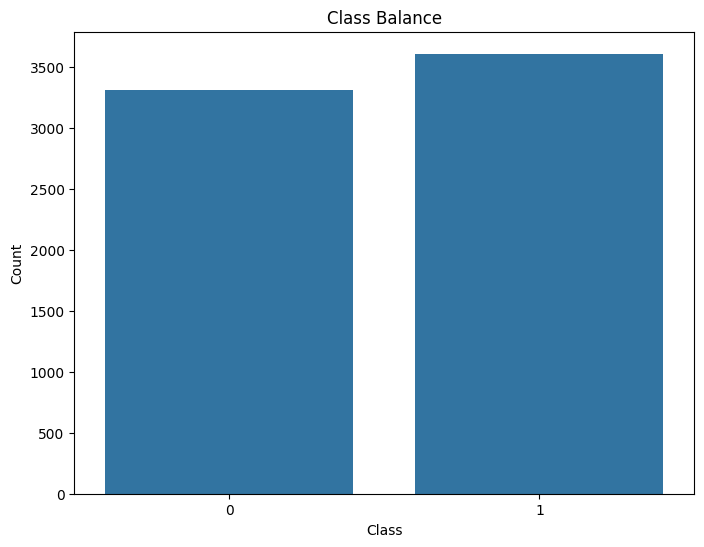

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y_train.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


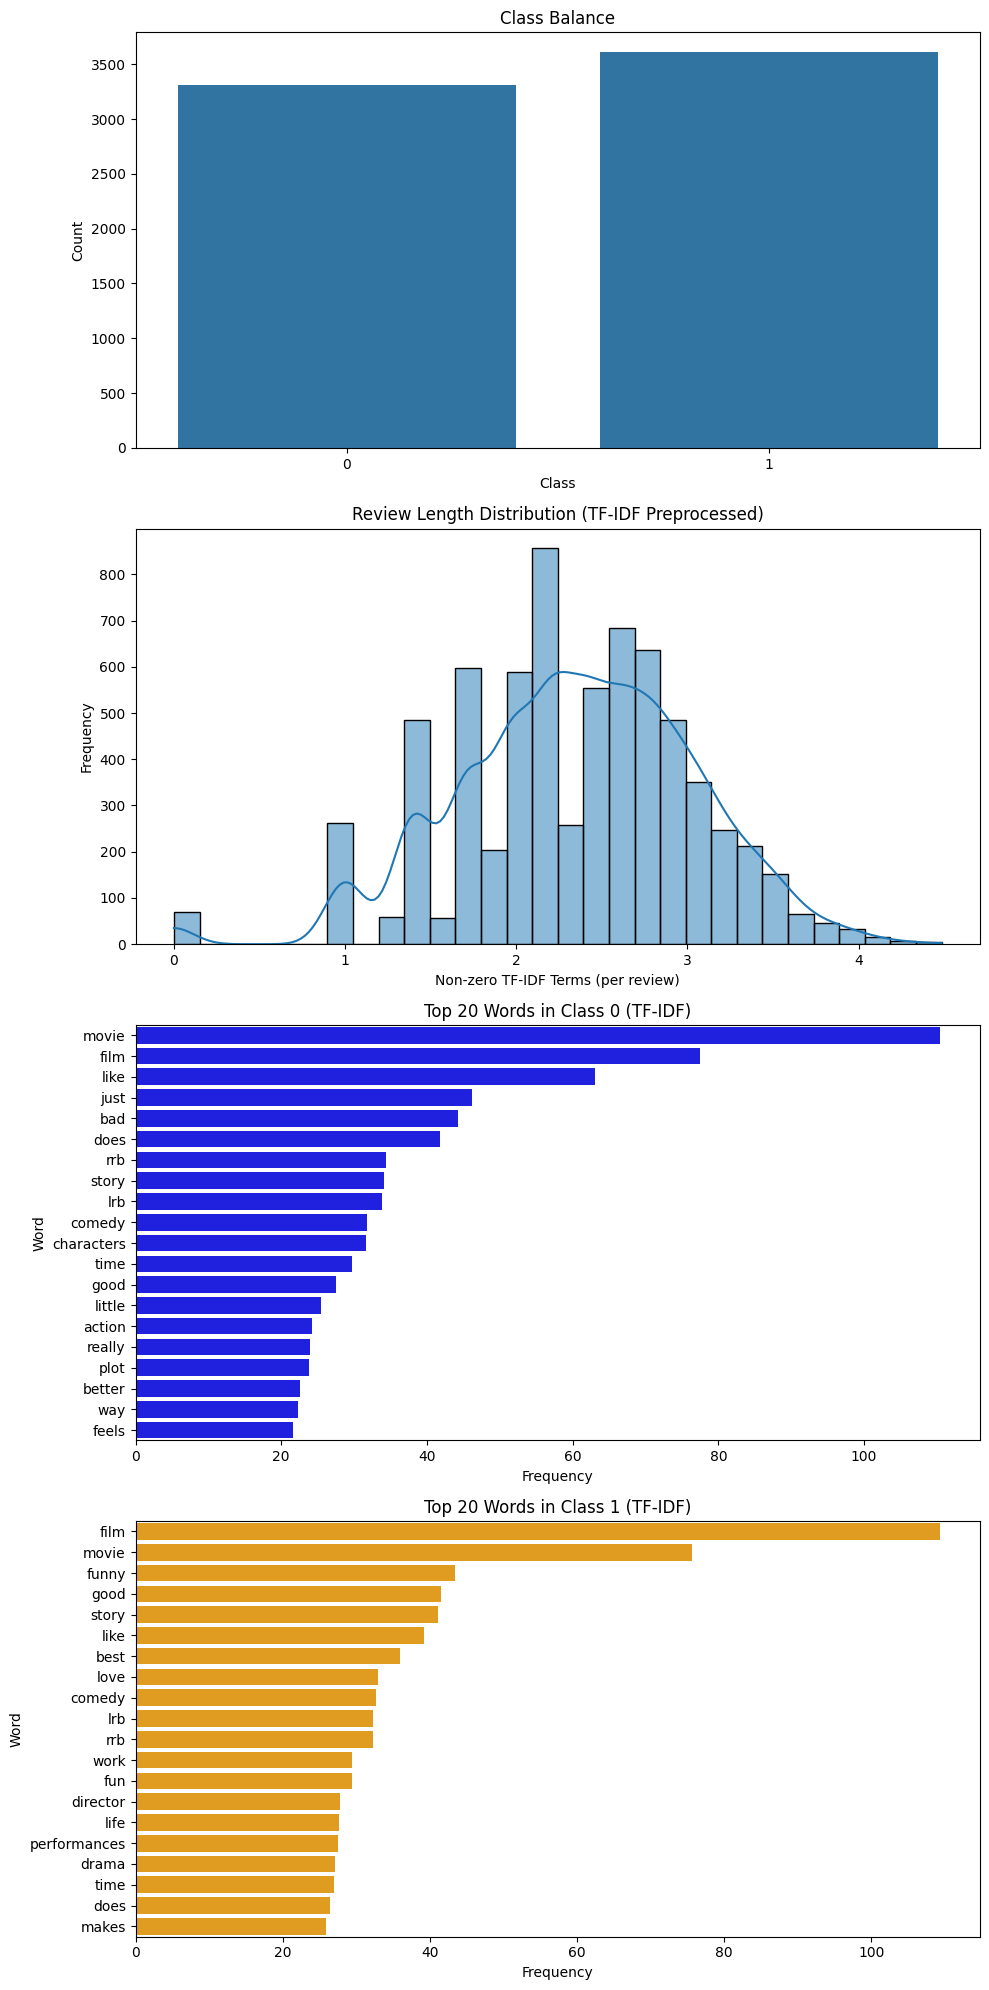

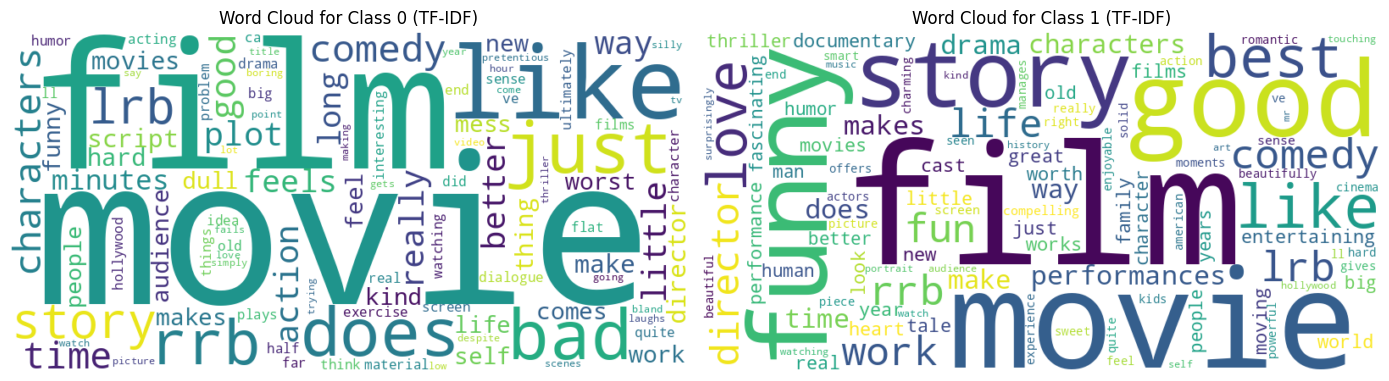

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class_counts = y_train.value_counts()
plt.figure(figsize=(10, 20))
plt.subplot(4, 1, 1)
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")

review_lengths = X_train_tfidf.sum(axis=1).A1
plt.subplot(4, 1, 2)
sns.histplot(review_lengths, bins=30, kde=True)
plt.title("Review Length Distribution (TF-IDF Preprocessed)")
plt.xlabel("Non-zero TF-IDF Terms (per review)")
plt.ylabel("Frequency")

class_0_indices = y_train[y_train == 0].index
class_1_indices = y_train[y_train == 1].index

class_0_matrix = X_train_tfidf[class_0_indices, :]
class_1_matrix = X_train_tfidf[class_1_indices, :]

class_0_word_counts = class_0_matrix.sum(axis=0).A1
class_1_word_counts = class_1_matrix.sum(axis=0).A1

top_class_0 = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': class_0_word_counts
}).nlargest(20, 'Frequency')

top_class_1 = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': class_1_word_counts
}).nlargest(20, 'Frequency')

plt.subplot(4, 1, 3)
sns.barplot(x='Frequency', y='Word', data=top_class_0, color='blue')
plt.title("Top 20 Words in Class 0 (TF-IDF)")

plt.subplot(4, 1, 4)
sns.barplot(x='Frequency', y='Word', data=top_class_1, color='orange')
plt.title("Top 20 Words in Class 1 (TF-IDF)")

plt.tight_layout()
plt.show()

wordcloud_0 = WordCloud(
    width=800, height=400, max_words=100, background_color='white',
    stopwords=ENGLISH_STOP_WORDS
).generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), class_0_word_counts)))

wordcloud_1 = WordCloud(
    width=800, height=400, max_words=100, background_color='white',
    stopwords=ENGLISH_STOP_WORDS
).generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), class_1_word_counts)))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Class 0 (TF-IDF)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Class 1 (TF-IDF)")

plt.tight_layout()
plt.show()


If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

###3. Fit model on preprocessed data


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Model Accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 75.12%

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       912
           1       0.76      0.74      0.75       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821



### 5. Repeat the above process with different models


In [65]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Model Accuracy: {:.2f}%".format(svm_accuracy * 100))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))



SVM Model Accuracy: 77.81%

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       912
           1       0.76      0.81      0.78       909

    accuracy                           0.78      1821
   macro avg       0.78      0.78      0.78      1821
weighted avg       0.78      0.78      0.78      1821



In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

vectorizer.fit(X_train_lemmatized)
X_train_tfidf = vectorizer.transform(X_train_lemmatized)
X_test_tfidf = vectorizer.transform(X_test_lemmatized)

param_grid_rf = {
  'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train_tfidf, y_train)

print("Best Model Parameters:", random_search_rf.best_params_)
print("Best Cross-Validation Score: {:.2f}%".format(random_search_rf.best_score_ * 100))

best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_tfidf)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy with Best Model: {:.2f}%".format(test_accuracy_rf * 100))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Model Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Cross-Validation Score: 65.53%
Test Accuracy with Best Model: 65.90%

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.46      0.58       912
           1       0.61      0.86      0.71       909

    accuracy                           0.66      1821
   macro avg       0.69      0.66      0.65      1821
weighted avg       0.69      0.66      0.65      1821



In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

y_pred_knn = knn_model.predict(X_test_tfidf)

test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy with KNN Model: {:.2f}%".format(test_accuracy_knn * 100))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))




Test Accuracy with KNN Model: 53.16%

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.66      0.59       912
           1       0.54      0.40      0.46       909

    accuracy                           0.53      1821
   macro avg       0.53      0.53      0.52      1821
weighted avg       0.53      0.53      0.52      1821



In [68]:
print("\nClassification Report SVM:\n")
print(classification_report(y_test, y_pred_svm))

print("\nClassification Report KNN:\n")
print(classification_report(y_test, y_pred_knn))

print("\nClassification Report GridSearch + RF:\n")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report RF:\n")
print(classification_report(y_test, y_pred))


Classification Report SVM:

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       912
           1       0.76      0.81      0.78       909

    accuracy                           0.78      1821
   macro avg       0.78      0.78      0.78      1821
weighted avg       0.78      0.78      0.78      1821


Classification Report KNN:

              precision    recall  f1-score   support

           0       0.53      0.66      0.59       912
           1       0.54      0.40      0.46       909

    accuracy                           0.53      1821
   macro avg       0.53      0.53      0.52      1821
weighted avg       0.53      0.53      0.52      1821


Classification Report GridSearch + RF:

              precision    recall  f1-score   support

           0       0.76      0.46      0.58       912
           1       0.61      0.86      0.71       909

    accuracy                           0.66      1821
   macro avg       0.69      

### Discuss which models performed better and why?

Out of the four models implemented the order in which they performed is as follows : SVM, Random Forest, GridSearch, and KNN. This makes sense as some models are too complex and required simplification to process in Colab (Gridsearch), while others (KNN) are not sufficiently complex to learn on the complex text data.

## Instructions for Part 2 (neural networks):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer
3. Fit model on preprocessed data
4. Generate predictions from X_test data


###1.   Load Data


In [69]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train = train_df['review']
y_train = train_df['sentiment']

X_val = val_df['review']
y_val = val_df['sentiment']

X_test = test_df['review']
y_test = test_df['sentiment']

X_train.head()


,review
0,"a stirring , funny and finally transporting re..."
1,apparently reassembled from the cutting-room f...
2,they presume their audience wo n't sit still f...
3,this is a visually stunning rumination on love...
4,jonathan parker 's bartleby should have been t...


###2.   Preprocess data using keras tokenizer


In [70]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train = train_df['review']
y_train = train_df['sentiment']

X_val = val_df['review']
y_val = val_df['sentiment']

X_test = test_df['review']
y_test = test_df['sentiment']

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

def preprocessor(data):
    sequences = tokenizer.texts_to_sequences(data)
    padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
    return padded

X_train_padded = preprocessor(X_train)
X_test_padded = preprocessor(X_test)

###3. Fit model on preprocessed data


In [71]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

X_train = train_df['review']
y_train = train_df['sentiment']

X_val = val_df['review']
y_val = val_df['sentiment']

X_test = test_df['review']
y_test = test_df['sentiment']

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

def preprocessor(data):
    sequences = tokenizer.texts_to_sequences(data)
    padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
    return padded

X_train_padded = preprocessor(X_train)
X_val_padded = preprocessor(X_val)
X_test_padded = preprocessor(X_test)

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_val_padded, y_val), batch_size=32)

print(X_train_padded.shape)
print(X_test_padded.shape)


Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5187 - loss: 0.6922 - val_accuracy: 0.6984 - val_loss: 0.6601
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.5722 - val_accuracy: 0.7867 - val_loss: 0.4773
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9359 - loss: 0.2212 - val_accuracy: 0.7890 - val_loss: 0.4987
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.0809 - val_accuracy: 0.7890 - val_loss: 0.5600
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0349 - val_accuracy: 0.7729 - val_loss: 0.6317
(6920, 100)
(1821, 100)


Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0164 - val_accuracy: 0.7798 - val_loss: 0.6659
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0094 - val_accuracy: 0.7787 - val_loss: 0.7168
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0055 - val_accuracy: 0.7764 - val_loss: 0.7654
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.7741 - val_loss: 0.7863
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.7787 - val_loss: 0.8214


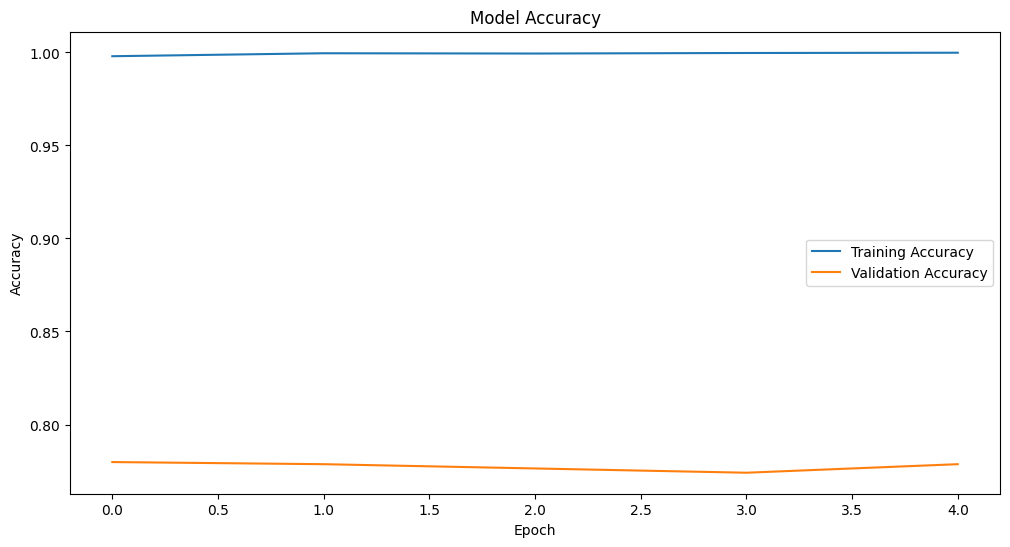

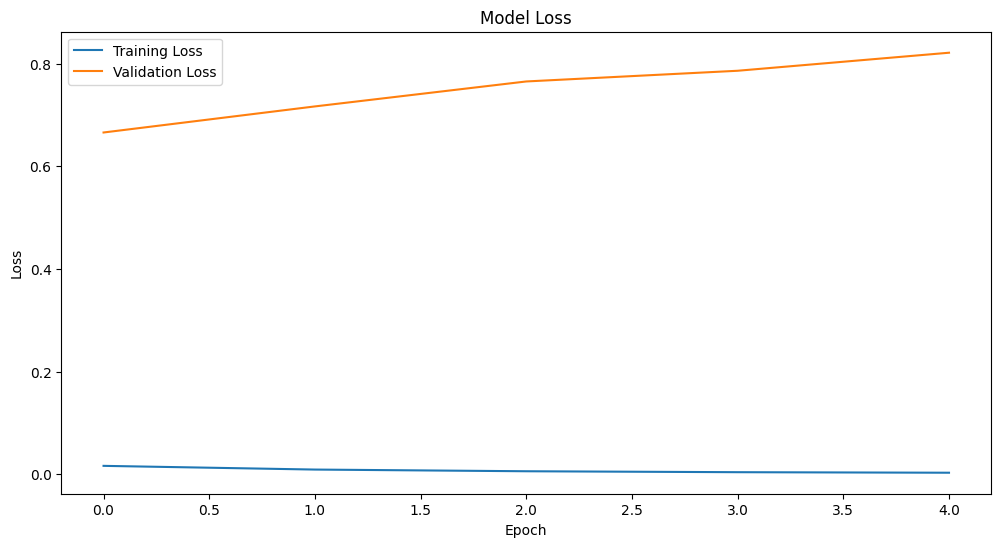

In [72]:

history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    validation_data=(X_val_padded, y_val),
    batch_size=32
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 4. Generate predictions from X_test data and calculate accuracy




In [73]:
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.78


### 5. Experiment with more models


Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5118 - loss: 0.8155 - val_accuracy: 0.5092 - val_loss: 0.7010
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.4923 - loss: 0.7485 - val_accuracy: 0.5092 - val_loss: 0.8490
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5063 - loss: 0.7194 - val_accuracy: 0.4908 - val_loss: 0.7515
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5162 - loss: 0.7013 - val_accuracy: 0.5092 - val_loss: 0.7685
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5182 - loss: 0.6975 - val_accuracy: 0.4908 - val_loss: 0.6991


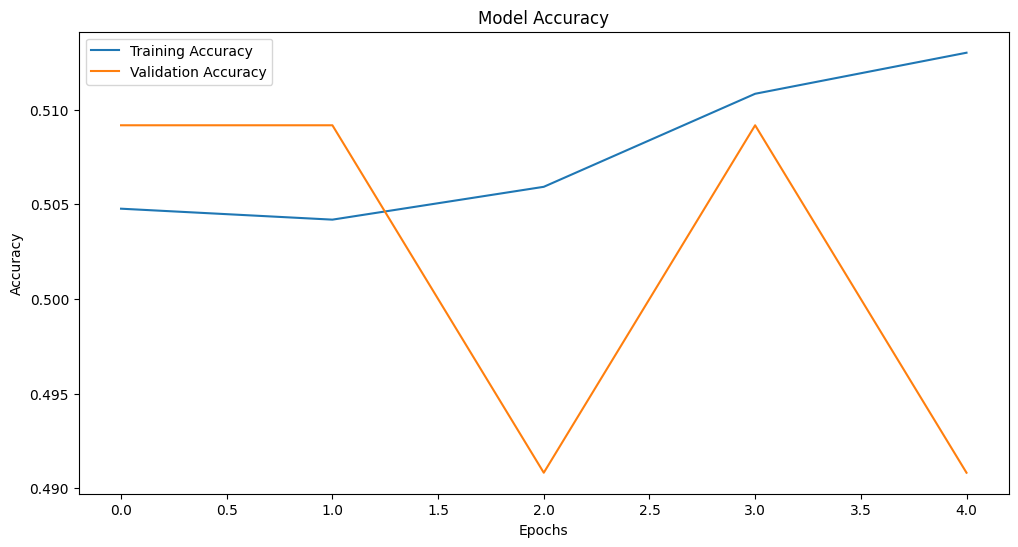

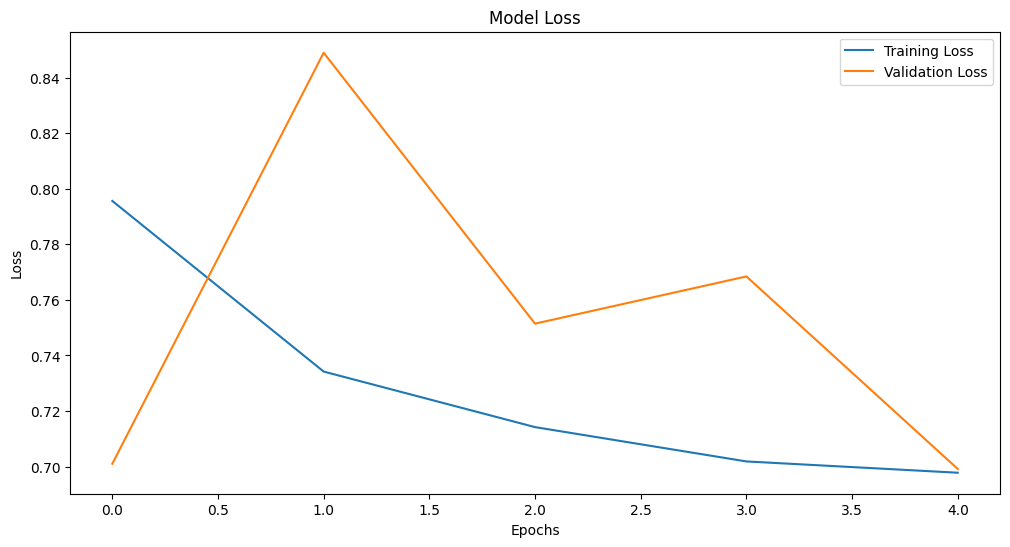

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test Accuracy: 0.50


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    validation_data=(X_val_padded, y_val),
    batch_size=32
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


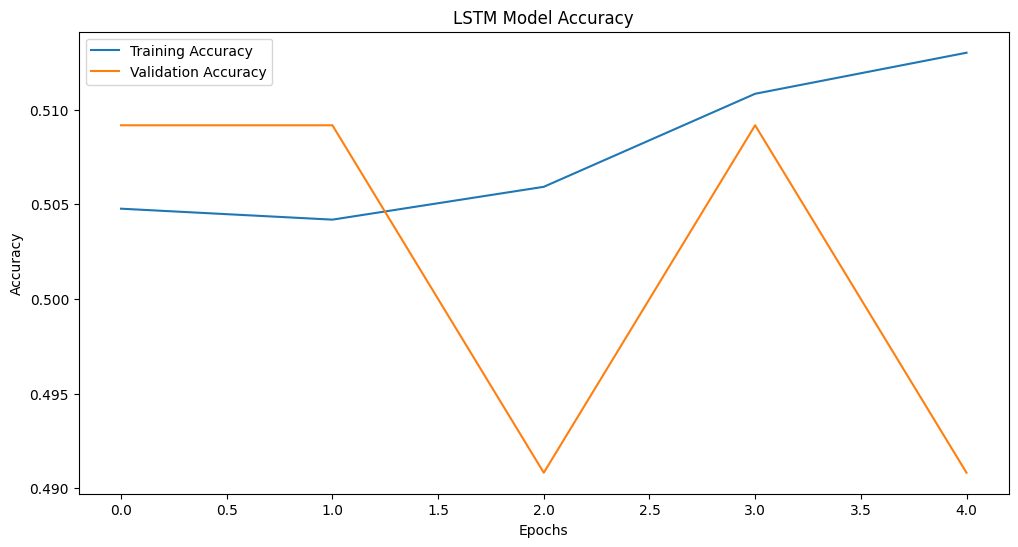

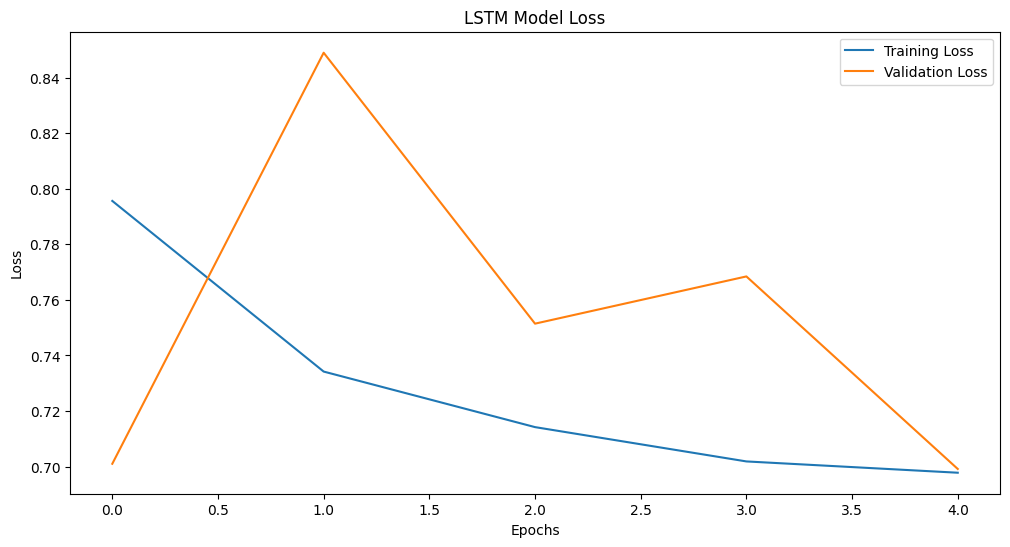

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Does your model perform better or worse than your prior deep learning model? Why might that be the case?

A LTSM model may not be the correct methodology despite how it is modified. It is simply overkill for the simple task, and a simplier model may be more effective. At the same time LTSM is sequential in nature which will make it slow and hard to modify iteratively.

### 6. Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [76]:
! pip install keras_tuner

Reloading Tuner from tuning_directory/lstm_tuning/tuner0.json
Best embedding dimension: 128
Number of LSTM layers: 1
Learning rate: 0.0001
Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5134 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6935
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5267 - loss: 0.6918 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5249 - loss: 0.6922 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5263 - loss: 0.6918 - val_accuracy: 0.5092 - val_loss: 0.6933
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5267 - loss: 0.6918 - val_accuracy: 0.5092 - val_loss: 0.6932


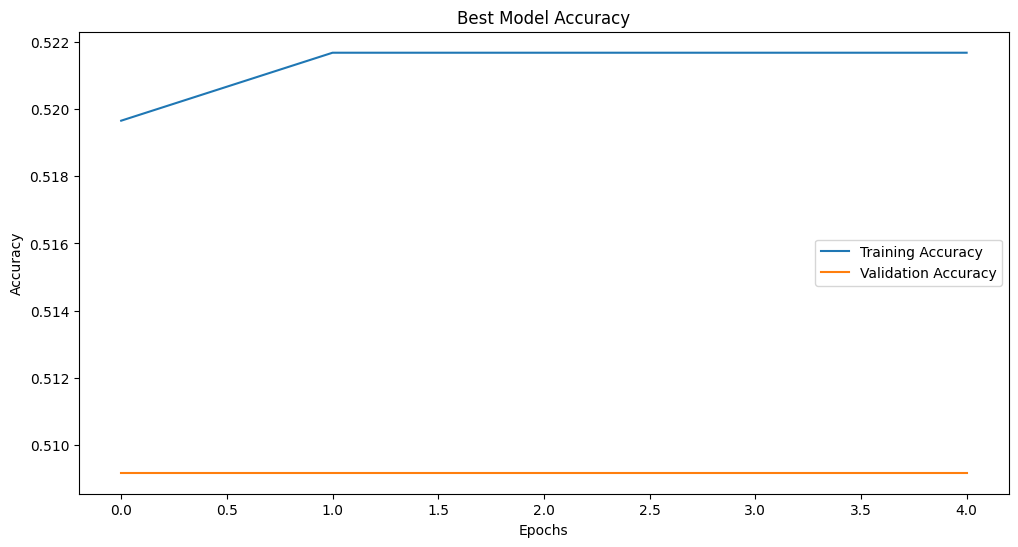

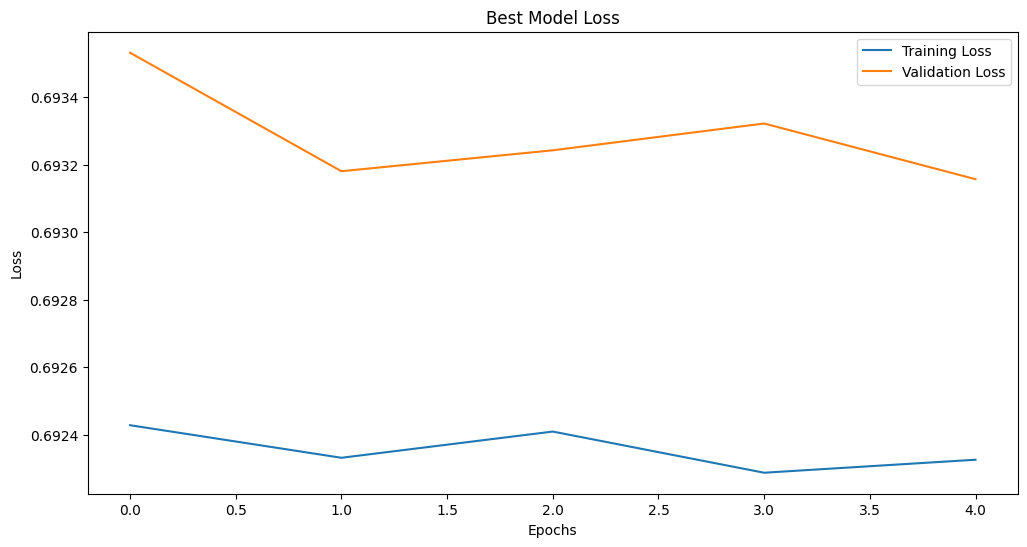

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
import keras_tuner as kt
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000,
                        output_dim=hp.Int('embedding_dim', min_value=64, max_value=256, step=64),
                        input_length=100))

    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32),
                       return_sequences=(i < hp.Int('num_lstm_layers', 1, 3) - 1)))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuning_directory',
    project_name='lstm_tuning'
)

tuner.search(X_train_padded, y_train,
             epochs=5,
             validation_data=(X_val_padded, y_val),
             batch_size=128)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best embedding dimension: {best_hps.get('embedding_dim')}")
print(f"Number of LSTM layers: {best_hps.get('num_lstm_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train_padded, y_train,
    epochs=5,
    validation_data=(X_val_padded, y_val),
    batch_size=128
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Best Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [78]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best embedding dimension: {best_hps.get('embedding_dim')}")
print(f"Number of LSTM layers: {best_hps.get('num_lstm_layers')}")
for i in range(best_hps.get('num_lstm_layers')):
    print(f"Best LSTM units for layer {i}: {best_hps.get(f'lstm_units_{i}')}")
    print(f"Best dropout for layer {i}: {best_hps.get(f'dropout_{i}')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best embedding dimension: 128
Number of LSTM layers: 1
Best LSTM units for layer 0: 96
Best dropout for layer 0: 0.2
Best learning rate: 0.0001


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5049 - loss: 0.6931
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5141 - loss: 0.6928
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5127 - loss: 0.6934
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5293 - loss: 0.6917
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5178 - loss: 0.6923
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5085 - loss: 0.6933
Test Accuracy: 0.50


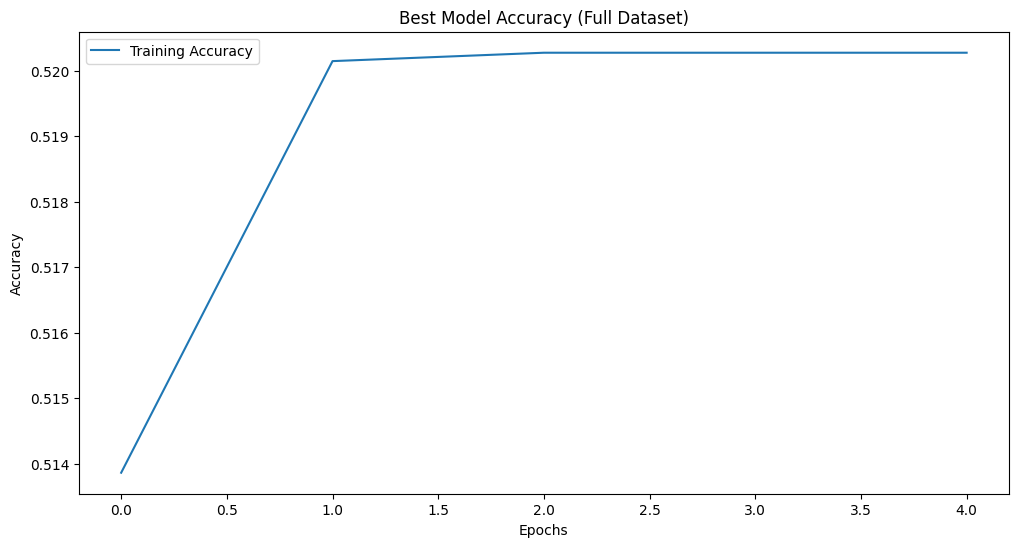

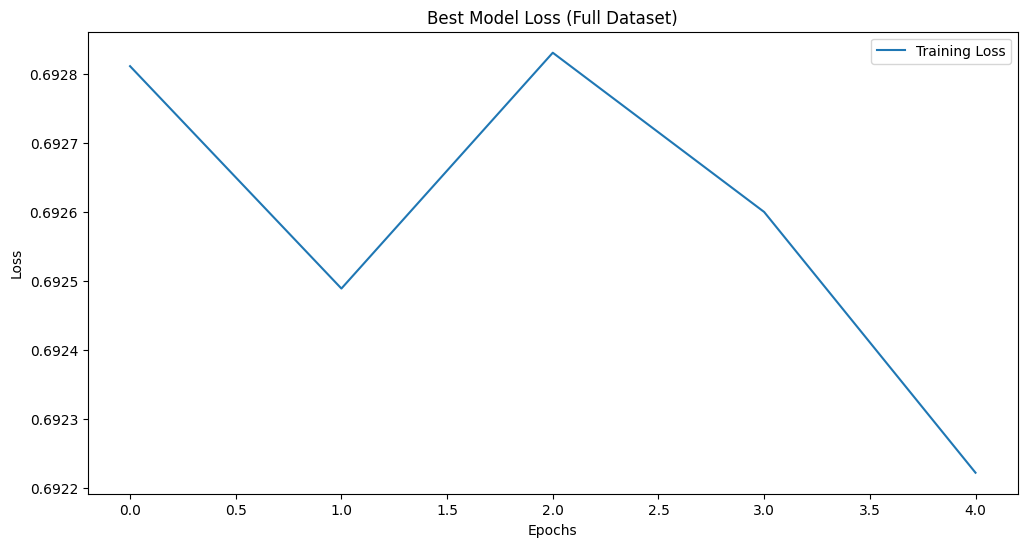

In [79]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

def build_best_model(best_hps):
    model = Sequential()
    model.add(Embedding(input_dim=10000,
                        output_dim=best_hps.get('embedding_dim'),
                        input_length=100))
    for i in range(best_hps.get('num_lstm_layers')):
        model.add(LSTM(units=best_hps.get(f'lstm_units_{i}'),
                       return_sequences=(i < best_hps.get('num_lstm_layers') - 1)))
        model.add(Dropout(best_hps.get(f'dropout_{i}')))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

X_combined = np.concatenate((X_train_padded, X_val_padded), axis=0)
y_combined = np.concatenate((y_train, y_val), axis=0)

best_model = build_best_model(best_hps)

history = best_model.fit(
    X_combined, y_combined,
    epochs=5,
    batch_size=128
)

test_loss, test_accuracy = best_model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Best Model Accuracy (Full Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Best Model Loss (Full Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [80]:
best_hps = tuner.get_best_hyperparameters(num_trials=2)
for i, hp in enumerate(best_hps):
    print(f"Trial {i+1}:")
    print(hp.values)



Trial 1:
{'embedding_dim': 128, 'num_lstm_layers': 1, 'lstm_units_0': 96, 'dropout_0': 0.2, 'learning_rate': 0.0001, 'lstm_units_1': 128, 'dropout_1': 0.2}
Trial 2:
{'embedding_dim': 128, 'num_lstm_layers': 2, 'lstm_units_0': 128, 'dropout_0': 0.30000000000000004, 'learning_rate': 0.01, 'lstm_units_1': 32, 'dropout_1': 0.2}


What were the best hyperparameters found? Why might that be performing better than others?

The best hyperparmeters are as following.

LTSM 96 : Allows for better learning of the complex patterns required for linguistic analysis

Dropout 0.4 : Better regularization avoids overfitting

Learning Rate 0.001 : A minimized learning rate is optimal for the model adjusting throughout its learning, especially due to its complexity.


## 3 more models

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model

○ Use Transfer learning with Glove Embeddings for 2nd model

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related)

In [81]:
#MODEL 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

conv_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

conv_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
conv_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_val_padded, y_val))

feature_extractor = Sequential(conv_model.layers[:-1])
X_train_features = feature_extractor.predict(X_train_padded)
X_val_features = feature_extractor.predict(X_val_padded)
X_test_features = feature_extractor.predict(X_test_padded)

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
svm_model.fit(X_train_features, y_train)

y_pred_model1 = svm_model.predict(X_test_features)
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
print(f"Test Accuracy for MODEL 1 (Conv1D + SVM): {accuracy_model1:.2f}")

print("\nClassification Report for MODEL 1 (Conv1D + SVM):\n")
print(classification_report(y_test, y_pred_model1))

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5560 - loss: 0.6799 - val_accuracy: 0.7821 - val_loss: 0.4830
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8569 - loss: 0.3336 - val_accuracy: 0.7890 - val_loss: 0.4727
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9577 - loss: 0.1311 - val_accuracy: 0.7936 - val_loss: 0.5662
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0561 - val_accuracy: 0.7947 - val_loss: 0.6989
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9959 - loss: 0.0212 - val_accuracy: 0.7901 - val_loss: 0.8105
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy for MODEL 1 (Conv1D + SVM): 0.78

Classification Report for MODEL 1 (Conv1D + SVM):

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       912
           1       0.78      0.79   

In [ ]:
!rm -f glove.6B.zip glove.6B.100d.txt

!wget --no-check-certificate https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q glove.6B.zip

In [82]:
#MODEL 2
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

def load_glove_embeddings(glove_file, embedding_dim=100):
    embeddings_index = {}
    with open(glove_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = vector
    return embeddings_index

def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    num_words = min(len(tokenizer.word_index) + 1, 10000)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i >= 10000:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

def extract_glove_features(X_seq, embedding_matrix):
    embeddings = np.zeros((X_seq.shape[0], embedding_matrix.shape[1]))
    for i, seq in enumerate(X_seq):
        valid_embeddings = [embedding_matrix[word_idx] for word_idx in seq if word_idx != 0]
        if valid_embeddings:
            embeddings[i] = np.mean(valid_embeddings, axis=0)
    return embeddings

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

glove_file = 'glove.6B.100d.txt'
embedding_dim = 100
embeddings_index = load_glove_embeddings(glove_file, embedding_dim)

embedding_matrix = create_embedding_matrix(tokenizer, embeddings_index, embedding_dim)

X_train_glove = extract_glove_features(X_train_seq, embedding_matrix)
X_val_glove = extract_glove_features(X_val_seq, embedding_matrix)
X_test_glove = extract_glove_features(X_test_seq, embedding_matrix)

svm_model_glove = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
svm_model_glove.fit(X_train_glove, y_train)

y_pred_model2 = svm_model_glove.predict(X_test_glove)
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
print(f"Test Accuracy for MODEL 2 (GloVe + SVM): {accuracy_model2:.2f}")

print("\nClassification Report for MODEL 2 (GloVe + SVM):\n")
print(classification_report(y_test, y_pred_model2))

--2024-12-13 01:29:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.11MB/s    in 2m 43s  

2024-12-13 01:31:59 (5.03 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Test Accuracy for MODEL 2 (GloVe + SVM): 0.76

Classification Report for MODEL 2 (GloVe + SVM):

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       912
           1       0.75      0.78      0.76       909

  

In [83]:
!pip install transformers datasets
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [84]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import torch

In [86]:
#MODEL 3
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import torch
import numpy as np
import pandas as pd
import time

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
bert_model = DistilBertModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

def prepare_text_data(data):
    if isinstance(data, pd.Series):
        data = data.fillna("").astype(str).tolist()
    elif isinstance(data, list):
        data = [str(x) if x is not None else "" for x in data]
    else:
        raise ValueError("Input data must be a Pandas Series or a List of strings.")
    return data

X_train = prepare_text_data(X_train)
X_val = prepare_text_data(X_val)
X_test = prepare_text_data(X_test)

def extract_bert_embeddings_batch(texts, tokenizer, model, batch_size=64, max_length=64):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            start_time = time.time()
            batch_texts = texts[i:i + batch_size]
            tokens = tokenizer(
                batch_texts,
                padding="max_length",
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            ).to(device)
            output = model(**tokens)
            cls_embeddings = output.last_hidden_state[:, 0, :]
            embeddings.append(cls_embeddings.cpu().numpy())
            end_time = time.time()
            print(f"Processed batch {i // batch_size + 1}/{len(texts) // batch_size + 1} "
                  f"in {end_time - start_time:.2f} seconds.")
    return np.vstack(embeddings)

X_train_bert = extract_bert_embeddings_batch(X_train, tokenizer, bert_model, batch_size=64, max_length=64)
X_val_bert = extract_bert_embeddings_batch(X_val, tokenizer, bert_model, batch_size=64, max_length=64)
X_test_bert = extract_bert_embeddings_batch(X_test, tokenizer, bert_model, batch_size=64, max_length=64)

svm_model_bert = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
svm_model_bert.fit(X_train_bert, y_train)

y_pred_model3 = svm_model_bert.predict(X_test_bert)
accuracy_model3 = accuracy_score(y_test, y_pred_model3)
print(f"Test Accuracy for MODEL 3 (DistilBERT + SVM): {accuracy_model3:.2f}")

print("\nClassification Report for MODEL 3 (DistilBERT + SVM):\n")
print(classification_report(y_test, y_pred_model3))


Processed batch 1/109 in 0.30 seconds.
Processed batch 2/109 in 0.16 seconds.
Processed batch 3/109 in 0.15 seconds.
Processed batch 4/109 in 0.17 seconds.
Processed batch 5/109 in 0.15 seconds.
Processed batch 6/109 in 0.15 seconds.
Processed batch 7/109 in 0.14 seconds.
Processed batch 8/109 in 0.14 seconds.
Processed batch 9/109 in 0.14 seconds.
Processed batch 10/109 in 0.15 seconds.
Processed batch 11/109 in 0.21 seconds.
Processed batch 12/109 in 0.17 seconds.
Processed batch 13/109 in 0.19 seconds.
Processed batch 14/109 in 0.21 seconds.
Processed batch 15/109 in 0.15 seconds.
Processed batch 16/109 in 0.15 seconds.
Processed batch 17/109 in 0.19 seconds.
Processed batch 18/109 in 0.23 seconds.
Processed batch 19/109 in 0.16 seconds.
Processed batch 20/109 in 0.16 seconds.
Processed batch 21/109 in 0.22 seconds.
Processed batch 22/109 in 0.20 seconds.
Processed batch 23/109 in 0.20 seconds.
Processed batch 24/109 in 0.21 seconds.
Processed batch 25/109 in 0.16 seconds.
Processed

Tabularize results from ALL your models in this notebook and compare performance

In [87]:
# Consolidated Classification Report Summary
print("\n--- Final Model Comparison ---\n")

print("\nClassification Report MODEL 1 (Conv1D + SVM):\n")
print(classification_report(y_test, y_pred_model1))

print("\nClassification Report MODEL 2 (GloVe + SVM):\n")
print(classification_report(y_test, y_pred_model2))

print("\nClassification Report MODEL 3 (DistilBERT + SVM):\n")
print(classification_report(y_test, y_pred_model3))
print("\nClassification Report SVM:\n")
print(classification_report(y_test, y_pred_svm))

print("\nClassification Report KNN:\n")
print(classification_report(y_test, y_pred_knn))

print("\nClassification Report GridSearch + RF:\n")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report RF:\n")
print(classification_report(y_test, y_pred))


--- Final Model Comparison ---


Classification Report MODEL 1 (Conv1D + SVM):

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       912
           1       0.78      0.79      0.78       909

    accuracy                           0.78      1821
   macro avg       0.78      0.78      0.78      1821
weighted avg       0.78      0.78      0.78      1821


Classification Report MODEL 2 (GloVe + SVM):

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       912
           1       0.75      0.78      0.76       909

    accuracy                           0.76      1821
   macro avg       0.76      0.76      0.76      1821
weighted avg       0.76      0.76      0.76      1821


Classification Report MODEL 3 (DistilBERT + SVM):

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       912
           1       0.82      0.87      0.85       909

  

Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any.

In [ ]:
# As discussed in previous cells, the worst performing models were not intended for the binary text classification for this project. The most effective SVM model utilizing BERT Tokenization demonstrates that with significantly higher accuracy than any other model, and outperforming less effective models by about 30% on pure accuracy.